In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Derivatives in Machine Learning

---

## 1. Why Derivatives Matter in ML

- Optimization (gradient descent)
- Sensitivity analysis
- Backpropagation in neural networks

---

## 2. Derivative Basics: Slope of a Function

### 💡 Example: f(x) = x²

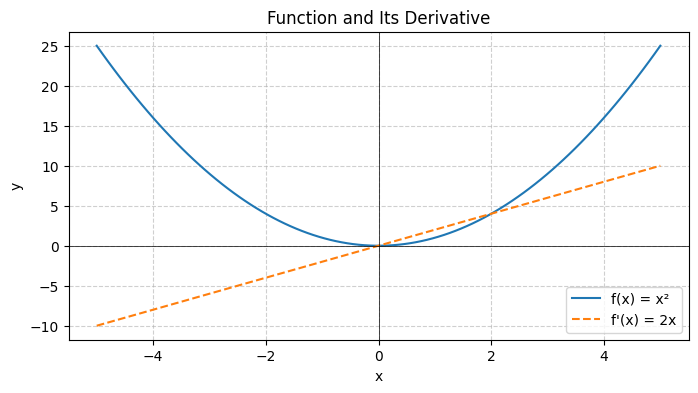

In [2]:
x = np.linspace(-5, 5, 100)
y = x**2
dy_dx = 2 * x

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='f(x) = x²')
plt.plot(x, dy_dx, label="f'(x) = 2x", linestyle='--')
plt.title("Function and Its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 3. Derivatives in Cost Functions

### 💡 Example: MSE Loss = (1/n) * Σ(y - ŷ)²

Taking derivative w.r.t. model weights to minimize this function using gradient descent.

---

## 4. Partial Derivatives

Used when functions have multiple variables.

### 💡 Example: f(x, y) = x² + y²

In [5]:
from sympy import symbols, diff

x, y = symbols('x y')
f = x**2 + y**2

fx = diff(f, x)
fy = diff(f, y)

fx, fy

(2*x, 2*y)

## 5. Gradient Vector

The vector of partial derivatives:
$$ \nabla f = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \dots \right] $$

### 🔧 Use: Points in the direction of steepest ascent. Negative gradient = steepest descent.

---

## 6. Chain Rule in Backpropagation

If z = f(g(x)), then:
$$ \frac{dz}{dx} = \frac{dz}{dg} \cdot \frac{dg}{dx} $$

### 💡 Example:

In [6]:
from sympy import Function

g = Function('g')(x)
f = Function('f')(g)

diff(f, x)

Derivative(f(g(x)), g(x))*Derivative(g(x), x)

## 7. Visualizing Derivatives in Logistic Regression

### Logistic Sigmoid:
$$ \sigma(x) = \frac{1}{1 + e^{-x}} \quad ; \quad \sigma'(x) = \sigma(x)(1 - \sigma(x)) $$


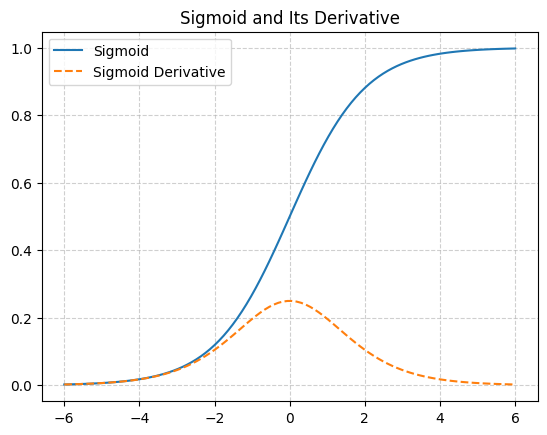

In [7]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_deriv = lambda x: sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-6, 6, 100)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, sigmoid_deriv(x), label='Sigmoid Derivative', linestyle='--')
plt.title("Sigmoid and Its Derivative")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 8. Derivatives in Activation Functions

- **ReLU**: max(0, x) → derivative is 0 when x < 0, 1 when x > 0
- **Tanh**: derivative = 1 - tanh²(x)

---

## 9. Second Derivative & Convexity

- If \( f''(x) > 0 \): Function is convex → good for optimization
- If \( f''(x) < 0 \): Function is concave

### 💡 Useful in checking if a local minimum is a global minimum.

In [ ]:
from sympy import diff

x = symbols('x')

f = x**2 + 3*x + 2
f2 = diff(f, x, 2) #calculating second derivate
f2

2

### Integrals in Machine Learning

---

## 1. What is an Integral?

### 📌 Definition:
An integral represents the area under a curve. In ML, it's used to compute expectations, cumulative probabilities, and normalizing constants.

- **Indefinite Integral**: General form (antiderivative)
  $$ \int f(x) dx $$

- **Definite Integral**: Area under the curve from a to b
  $$ \int_a^b f(x) dx $$

### 💡 ML Relevance:
- Calculating area/probabilities under PDFs
- Expectations and variances
- Normalization of probability functions

---

## 2. Area Under Curve (AUC)

Area under curve from -2 to 2: 1.7642


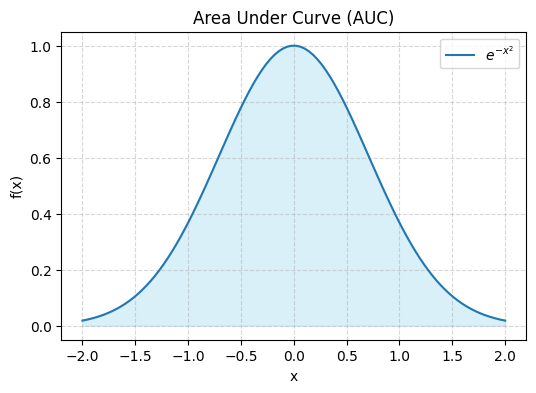

In [14]:
from scipy.integrate import quad

# Function
f = lambda x: np.exp(-x**2)

# Numerical Integration
area, _ = quad(f, -2, 2)
print("Area under curve from -2 to 2:", round(area, 4))

x = np.linspace(-2, 2, 100)
y = f(x)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$e^{-x^2}$')
plt.fill_between(x, y, alpha=0.3, color='skyblue')
plt.title("Area Under Curve (AUC)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## 3. Expectation using Integrals

### 📌 Formula:
$$ \mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx $$
---

### Expectation of standard normal distribution

In [15]:
# Expectation of standard normal distribution
from scipy.stats import norm

mu, sigma = 0, 1
f = lambda x: x * norm.pdf(x, mu, sigma)
expectation, _ = quad(f, -np.inf, np.inf)
print("Expected value of standard normal:", round(expectation, 4))

Expected value of standard normal: 0.0


### 4. Cumulative Distribution via Integral (CDF)


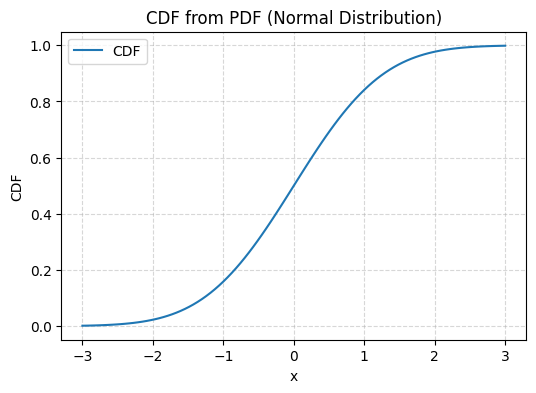

In [16]:
# CDF from PDF
x_vals = np.linspace(-3, 3, 100)
cdf_vals = [quad(lambda x: norm.pdf(x, mu, sigma), -np.inf, x)[0] for x in x_vals]

plt.figure(figsize=(6, 4))
plt.plot(x_vals, cdf_vals, label="CDF")
plt.title("CDF from PDF (Normal Distribution)")
plt.xlabel("x")
plt.ylabel("CDF")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## 5. Continuous Loss Function (Regression)

### 💡 Mean Squared Error in Continuous Case:
$$ MSE = \int (y - \hat{y})^2 p(y) dy $$

---

## 6. Normalizing a PDF

### 📌 Example:
Given an unnormalized function $$ f(x) = x^2 $$ on [0,1]:

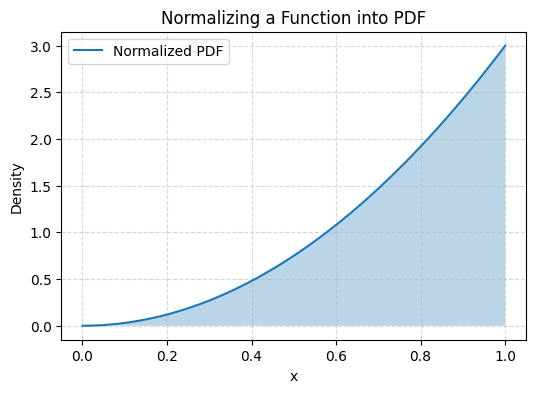

In [17]:
f = lambda x: x**2
Z, _ = quad(f, 0, 1)  # Partition function
pdf = lambda x: f(x) / Z

x = np.linspace(0, 1, 100)
y = pdf(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="Normalized PDF")
plt.fill_between(x, y, alpha=0.3)
plt.title("Normalizing a Function into PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## 7. Integrals in Bayesian Inference

### 📌 Posterior normalization:
$$ P(\theta | D) = \frac{P(D | \theta) P(\theta)}{\int P(D | \theta) P(\theta) d\theta} $$

Often intractable analytically — solved using numerical integration, Monte Carlo, or variational methods.

---

## 8. Numerical Integration Techniques (Optional)
- **Trapezoidal Rule**
- **Simpson's Rule**
- **Monte Carlo Integration**

In [18]:
# Monte Carlo example
samples = np.random.uniform(0, 1, 10000)
f_vals = samples**2
monte_carlo_integral = np.mean(f_vals)
print("Monte Carlo Approximation of ∫ x² dx from 0 to 1:", round(monte_carlo_integral, 4))

Monte Carlo Approximation of ∫ x² dx from 0 to 1: 0.3386
